In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/ab-test.csv')

In [3]:
control_after = data[(data['group'] == 'control') & (data['time'] == 'after')]['diff']
test_after = data[(data['group'] == 'test') & (data['time'] == 'after')]['diff']
control_before = data[(data['group'] == 'control') & (data['time'] == 'before')]['diff']
test_before = data[(data['group'] == 'test') & (data['time'] == 'before')]['diff']


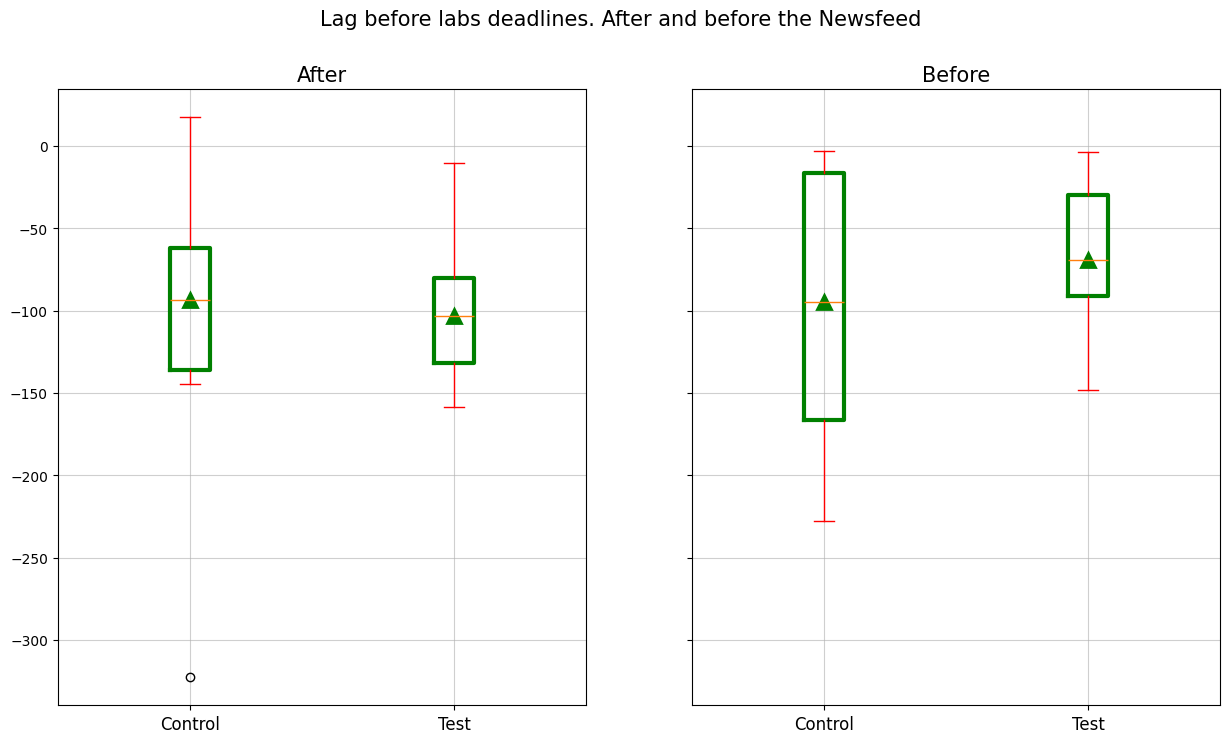

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

boxplot_data_after = [control_after, test_after]
axes[0].boxplot(
    boxplot_data_after,
    patch_artist=False,
    boxprops=dict(color='green', linewidth=3),
    whiskerprops=dict(color='red', linewidth=1),
    capprops=dict(color='red', linewidth=1),
    flierprops=dict(marker='o', markersize=6)
)

medians_after = [control_after.median(), test_after.median()]

for pos, median in zip([1, 2], medians_after):
    axes[0].plot(pos, median, marker='^', color='green', markersize=10, markeredgewidth=2, markerfacecolor='green')

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(['Control', 'Test'], fontsize=12)
axes[0].set_title('After', fontsize=15)
axes[0].grid(True, linestyle='-', alpha=0.6)

boxplot_data_before = [control_before, test_before]
axes[1].boxplot(
    boxplot_data_before,
    patch_artist=False,
    boxprops=dict(color='green', linewidth=3),
    whiskerprops=dict(color='red', linewidth=1),
    capprops=dict(color='red', linewidth=1),
    flierprops=dict(markerfacecolor='red', marker='o', markersize=6)
)

medians_before = [control_before.median(), test_before.median()]

for pos, median in zip([1, 2], medians_before):
    axes[1].plot(pos, median, marker='^', color='green', markersize=10, markeredgewidth=2, markerfacecolor='green')

axes[1].set_xticks([1, 2])
axes[1].set_xticklabels(['Control', 'Test'], fontsize=12)
axes[1].set_title('Before', fontsize=15)
axes[1].grid(True, linestyle='-', alpha=0.6)
plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

Каков был IQR контрольной группы до выхода новостей?

In [5]:
Q1 = control_before.quantile(0.25)
Q3 = control_before.quantile(0.75)
IQR = Q3 - Q1
IQR_rounded = round(IQR, -1)
print(f'До выхода новостей IQR контрольной группы был равен {int(IQR_rounded)}')

До выхода новостей IQR контрольной группы был равен 150
